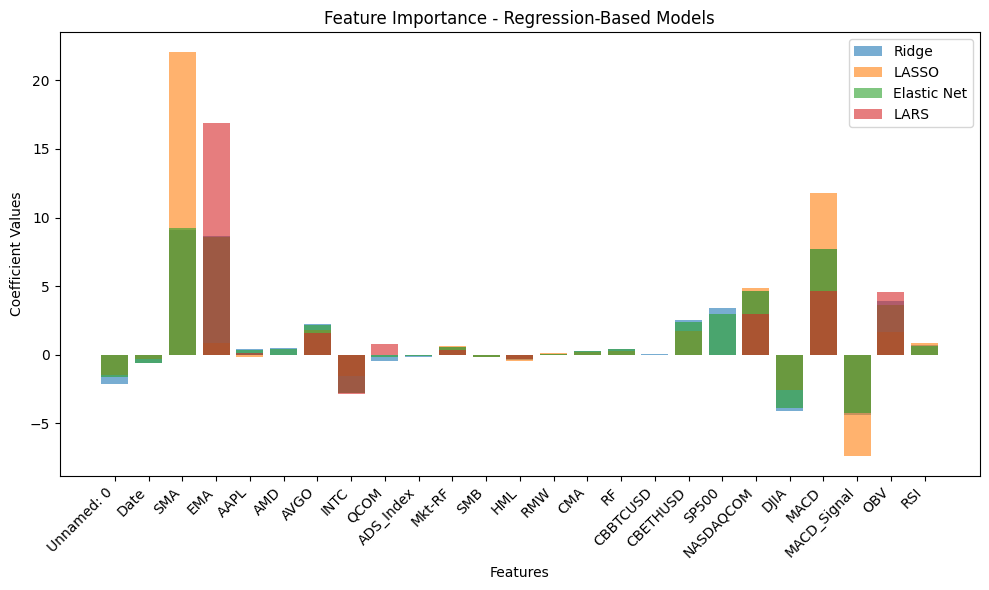

Ridge Selected Features: ['Unnamed: 0', 'Date', 'SMA', 'EMA', 'AAPL', 'AMD', 'AVGO', 'INTC', 'QCOM', 'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'CBBTCUSD', 'CBETHUSD', 'SP500', 'NASDAQCOM', 'DJIA', 'MACD', 'MACD_Signal', 'OBV', 'RSI']
LASSO Selected Features: ['Unnamed: 0', 'Date', 'SMA', 'EMA', 'AAPL', 'AVGO', 'INTC', 'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'CBETHUSD', 'NASDAQCOM', 'DJIA', 'MACD', 'MACD_Signal', 'OBV', 'RSI']
Elastic Net Selected Features: ['Unnamed: 0', 'Date', 'SMA', 'EMA', 'AAPL', 'AMD', 'AVGO', 'INTC', 'QCOM', 'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'CBETHUSD', 'SP500', 'NASDAQCOM', 'DJIA', 'MACD', 'MACD_Signal', 'OBV', 'RSI']
LARS Selected Features: ['EMA', 'AAPL', 'AVGO', 'INTC', 'QCOM', 'Mkt-RF', 'HML', 'NASDAQCOM', 'MACD', 'OBV']


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("./featurePrepared_updated.csv")  # Update the file path as needed
df = df.dropna()  # Drop missing values

# Define features (X) and target (y)
y = df['NVDA']  # Replace 'NVDA' with your target column name
X = df.drop(columns=['NVDA'], axis=1)  # Exclude the target column

# Standardize the features for regression-based models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_coef = ridge.coef_

# LASSO Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

# Elastic Net
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio balances LASSO and Ridge
elastic_net.fit(X_train, y_train)
elastic_net_coef = elastic_net.coef_

# LARS Regression
lars = Lars(n_nonzero_coefs=10)  # Set the max number of features selected
lars.fit(X_train, y_train)
lars_coef = lars.coef_

# Visualize the coefficients of each regression model
plt.figure(figsize=(10, 6))
features = X.columns

plt.bar(features, ridge_coef, alpha=0.6, label='Ridge')
plt.bar(features, lasso_coef, alpha=0.6, label='LASSO')
plt.bar(features, elastic_net_coef, alpha=0.6, label='Elastic Net')
plt.bar(features, lars_coef, alpha=0.6, label='LARS')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Coefficient Values")
plt.xlabel("Features")
plt.title("Feature Importance - Regression-Based Models")
plt.legend()
plt.tight_layout()
plt.show()

# Print selected features for each model
print("Ridge Selected Features:", [features[i] for i in range(len(ridge_coef)) if ridge_coef[i] != 0])
print("LASSO Selected Features:", [features[i] for i in range(len(lasso_coef)) if lasso_coef[i] != 0])
print("Elastic Net Selected Features:", [features[i] for i in range(len(elastic_net_coef)) if elastic_net_coef[i] != 0])
print("LARS Selected Features:", [features[i] for i in range(len(lars_coef)) if lars_coef[i] != 0])
